# Machine Learning


## El bosque: Inteligencia Artificial
Visto en un campo más amplio, el Machine Leaning o Aprendizaje Automático es un subconjunto de la Inteligencia Aritificial.

<img src="images/Diapositiva1.jpeg" width="700" height="400">

La imagen que antecede nos muestra varios componentes de la Inteligencia Artificial (IA) donde tenemos:

- **Supervised Learning**: Aprendizaje supervisado, se presenta en un círculo más grande puesto que es el que ha tenido más penetración en distintas aplicaciones, tanto desde la perspectiva de aplicaciones en la industria así como avances dado por la comunidad de desarrolladores y la academia. Hoy es posible hacer aprendizaje supervisado de alto nivel en un computador personal.

- **Unsupervised Learning**: Aprendizaje no supervisado, menos popular pero también con aplicaciones en distintas áreas.

- **Reinforcement Learning**: Aprendizaje por refuerzo, *inspirada en la psicología conductista, cuya ocupación es determinar qué acciones debe escoger un agente de software en un entorno dado con el fin de maximizar alguna noción de "recompensa" o premio acumulado*.

- **Generative IA**: Inteligencia Artificial Generativa, tiene por objetivo la generación de texto, imágenes u otros medios en respuesta a comandos.


Es importante mencionar que la Inteligencia Artificial Generativa está teniendo un gran impacto en distintas aplicaciones, pero el desarrollo de este tipo de IA es limitado a empresas con grandes capitales. Esto se debe a que se estima que desarrollar requiere de una inversión de alrededor de USD 500 millones.

## Machine Learning

Es un conjunto amplio de herramientas para entender y descrubrir estructras en los datos. Estas herramientas se clasifican en **supervisadas** y **no supervisadas**.

<img src="images/Diapositiva2.jpeg" width="700" height="400">

### Terminología

El **aprendizaje supervisado** implica la construcción de un modelo estadístico para **predecir** o estimar un resultado en función de una o más variables de entrada. Podemos considerar el aprendizaje supervisado como el uso de una función que asigna variables de entrada a un resultado.

- Las **variables de entrada** tienen muchos nombres, como: x, explicativa (*explanatory*), predictora (*predictor*), regresora (*regressor*), independiente y característica (*feature*).

- La **variable de salida** también tiene muchos nombres, como: y, respuesta (*response*), dependiente, objetivo (*target*), resultado y etiqueta (*label*).


En el **aprendizaje no supervisado**, hay entradas pero no salidas supervisadas; no obstante, podemos aprender relaciones y estructuras a partir de esos datos. Los problemas de aprendizaje no supervisado que cubrimos se dividen en dos grandes categorías:

- La **reducción de dimensionalidad** es una técnica para transformar datos de alta dimensión en un espacio de baja dimensión, preservando al mismo tiempo las propiedades útiles de los datos.

- La agrupación en **clústeres** o conglomerados es una técnica que implica encontrar subgrupos, o clústeres, en un conjunto de datos de modo que las observaciones dentro del mismo grupo sean bastante *similares* entre sí, mientras que las observaciones en diferentes grupos sean bastante *diferentes* entre sí.

## Aprendizaje Supervisado


Supongamos que observas una respuesta cuantitativa $Y$ y $p$ predictores, $X_1,X_2,\cdots,X_p$. Deseamos estimar una relación entre $Y$ y $X=(X_1,X_2,\cdots,X_p)$ que puede escribirse como:

$$
Y = f(X)+\epsilon
$$

$f$ es una fija de $X_1,X_2,\cdots,X_p$ que no conocemos, y $\epsilon$ es un término de **error aleatorio** que es independiente de $X$ y tiene media cero. En esta fórmula, $f$ representa la información sistemática que $X$ provee acerca de $Y$.

En el siguiente ejemplo, simulamos una relación entre Edad ($X$) e Ingreso ($Y$) donde

- $X\in [18,65]$
- $Y=f(X) = 1000log(X)+4000$
- $\epsilon \sim \mathcal{N}(\mu=0,\sigma=100)$

Luego truncamos los valores de Y entre 4000 y 30000 (nota que usamos `np.clip`).

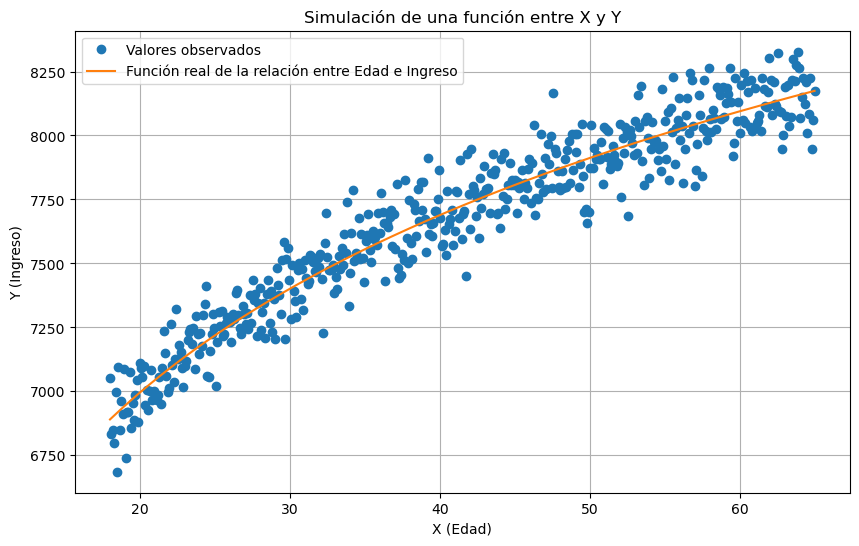

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generamos un rango de valores de X entre 18 y 65
N = 500
X = np.linspace(18, 65, N)

# Definimos una función no lineal para Y (por ejemplo, una función cuadrática)
fx = 1000*np.log(X)+ 4000
np.random.seed(1)
epsilon = np.random.normal(0, 100, N)
Y = fx+epsilon

# Limitamos los valores de Y entre 4000 y 30000
Y = np.clip(Y, 4000, 30000)

# Graficamos la función
plt.figure(figsize=(10, 6))
plt.plot(X, Y,"o", label='Valores observados')
plt.plot(X, fx, label='Función real de la relación entre Edad e Ingreso')
plt.xlabel('X (Edad)')
plt.ylabel('Y (Ingreso)')
plt.title('Simulación de una función entre X y Y')
plt.grid(True)
plt.legend()
plt.show()


En esencia, el aprendizaje supervisado es un conjunto de métodos que nos ayudan a estimar $f$. Al estimar $f$ aparecen conceptos teóricos con los que debemos familiarizarnos y también debemos tener herramientas que nos evaluar la estimación que hemos obtenido: $\hat{f}$.

### Estimar $f$

Hay dos razones para estimar $f$: predicción e inferencia.

#### Predicción

En problemas reales tenemos disponible datos de entrada $X$ y sus etiquetas $Y$ y deseamos estimar la relación entre $X$ y $Y$, para ello:

$$
\hat{Y} = \hat{f}(X)
$$

donde $\hat{f}$ representa nuestra estimación de $f$ y $\hat{Y}$ representa la predicción de $Y$.

No necesariamente debemos saber la forma funcional exacta de $\hat{f}$ siempre y cuando tengamos predicciones precisas de $Y$. Cuando esto sucede, se lo conoce como un problema de *caja negra*.

##### Error Total
En aprendizaje supervisado, el error total puede descomponerse en el **error de predicción esperado (EPE)**, que es la diferencia cuadrática esperada entre el resultado predicho $\hat{Y}$ y el resultado verdadero $Y$, es decir, el error cuadrático medio (MSE):

$$
EPE(X) = \mathbb{E}[(Y - \hat{Y}(X))^2]
$$

Donde:
- $Y$ es el valor verdadero (la etiqueta).
- $\hat{Y}(X)$ es la predicción del modelo en la entrada $X$.
- $\mathbb{E}[\cdot]$ denota la esperanza.

Ahora, queremos descomponer esto en componentes de **error reducible** y **error irreducible**.

**Error Reducible e Irreducible**

Dado que la etiqueta $Y$ se puede descomponer en una parte determinista $f(X)$ y un ruido $\epsilon$, es decir:

$$
Y = f(X) + \epsilon
$$

Donde:
- $f(X)$ es la verdadera función subyacente (que intentamos aproximar con nuestro modelo).
- $\epsilon$ es un ruido aleatorio con media cero $(\mathbb{E}[\epsilon] = 0$) y varianza $\sigma^2$ ($\text{Var}[\epsilon] = \sigma^2$).

El **error total** ahora puede descomponerse en:

$$
EPE(X) = \mathbb{E}[(f(X) + \epsilon - \hat{f}(X))^2]
$$

*Paso 1: Reordenar la expresión*

Agrupamos los términos para formar una suma:

$
(f(X) + \epsilon - \hat{f}(X)) = (f(X) - \hat{f}(X)) + \epsilon
$

Sustituimos en la expresión original:

$$
\text{EPE}(X) = \mathbb{E}\left[\left((f(X) - \hat{f}(X)) + \epsilon\right)^2\right]
$$


*Paso 2: Expandir el cuadrado*

Aplicamos la identidad algebraica $(a + b)^2 = a^2 + 2ab + b^2$:

$$
= \mathbb{E}[(f(X) - \hat{f}(X))^2 + 2(f(X) - \hat{f}(X))\epsilon + \epsilon^2]
$$


*Paso 3: Linealidad de la esperanza*

Separando en tres esperanzas:

$$
= \mathbb{E}[(f(X) - \hat{f}(X))^2] + 2\mathbb{E}[(f(X) - \hat{f}(X))\epsilon] + \mathbb{E}[\epsilon^2]
$$


*Paso 4: Propiedad del error*

Asumimos que:

- $\mathbb{E}[\epsilon] = 0$ (error centrado)
- $\epsilon$ es independiente de $\hat{f}(X)$. Bajo esta independencia, la esperanza del producto es el producto de las esperanzas: $\mathbb{E}[(f(X) - \hat{f}(X)) \cdot \epsilon] = \mathbb{E}[f(X) - \hat{f}(X)] \cdot \mathbb{E}[\epsilon]$

Entonces el término cruzado se anula:

$$
\mathbb{E}[(f(X) - \hat{f}(X))\epsilon] = 0
$$

Expandiendo esta expresión:

$$
EPE(X) = \mathbb{E}[(f(X) - \hat{f}(X))^2] + \mathbb{E}[\epsilon^2]
$$

Esto se puede interpretar como:

1. **Error Reducible**: El error debido a la incapacidad del modelo para aprender perfectamente la verdadera función $f(x)$. Esto está representado por $\mathbb{E}[(f(X) - \hat{f}(X))^2]$.
   
2. **Error Irreducible**: El error debido al ruido inherente en los datos, es decir, $\mathbb{E}[\epsilon^2] = \sigma^2$, que no se puede reducir, sin importar cuán bien el modelo aprenda la función verdadera.

Así, el error total es:

$$
EPE(X) = \underbrace{\mathbb{E}[(f(X) - \hat{f}(X))^2]}_{\text{Error Reducible}} + \underbrace{\sigma^2}_{\text{Error Irreducible}}
$$

#### Inferencia

Cuando estamos interesados en entender la asociación entre $Y$ y $X_1,X_2,\cdots,X_p$, la estimación de $f$, $\hat{f}$ no puede ser tratado como una caja negra. Nuestro objetivo no es necesariamente hacer predicciones de $Y$, sino que necesitamos tener una forma exacta de $f$.

Podemos estar interesados en responder a preguntas como:

- ¿Qué predictores se asocian con la respuesta?
- ¿Cuál es la relación entre la respuesta y cada predictor?
- ¿Puede la relación entre $Y$ y cada predictor ser lineal o es más sofisticada?

Dependiendo de si nuestro objetivo final es predicción, inferencia o una combinación de ambas, pueden ser apropiados distintos métodos para estimar $f$. 

Por ejemplo, los modelos lineales permiten una inferencia relativamente simple e interpretable, pero pueden no producir predicciones tan precisas como algunos otros enfoques de modelos lineales. Por el contrario, algunos de los enfoques altamente no lineales pueden proporcionar predicciones bastante precisas para $Y$ , pero esto se produce a expensas de un modelo menos interpretable para el cual la inferencia es más desafiante.

### Descomposición de Sesgo-Varianza (del Error Reducible)

El error reducible se puede descomponer aún más en **sesgo** y **varianza**:

$$
\mathbb{E}[(f(X) - \hat{f}(X))^2] = (\mathbb{E}[\hat{f}(X)] - f(x))^2 + \mathbb{E}[(\hat{f}(X) - \mathbb{E}[\hat{f}(X)])^2]
$$

Donde:
- **Sesgo**: $(\mathbb{E}[\hat{f}(X)] - f(X))^2$ es el error debido a las suposiciones del modelo que le impiden capturar perfectamente la función verdadera. Es decir, **mide cuánto se aleja en promedio tu modelo de la realidad**.
- **Varianza**: $\mathbb{E}[(\hat{f}(X) - \mathbb{E}[\hat{f}(X)])^2]$ es el error debido a la sensibilidad del modelo a diferentes conjuntos de datos de entrenamiento (es decir, cuánto varían las predicciones del modelo). Es decir, **mide cuánto varía tu modelo ante pequeños cambios en los datos de entrenamiento**.

Así, el error total se puede escribir como:

$$
EPE(x) = \underbrace{\text{Sesgo}^2 + \text{Varianza}}_{\text{Error Reducible}} + \underbrace{\sigma^2}_{\text{Error Irreducible}}
$$



**Para recordar:**

- **Error Reducible**: Esta es la parte del error que se puede reducir mejorando el modelo (por ejemplo, usando un modelo más complejo, mejor ajuste o más datos). Consiste en **Sesgo** y **Varianza**.
  
  $$
  \text{Error Reducible} = \text{Sesgo}^2 + \text{Varianza}
  $$

- **Error Irreducible**: Este es el ruido en los datos, que no se puede eliminar con ningún modelo. Está representado por la varianza del ruido $\sigma^2$.

  $$
  \text{Error Irreducible} = \sigma^2
  $$

Por lo tanto, la fórmula general para el error de predicción esperado (error total) es:

$$
EPE(x) = \text{Sesgo}^2 + \text{Varianza} + \sigma^2
$$


## Métodos de remuestreo

Los **métodos de remuestreo** son una herramienta indispensable en la estadística moderna. Implican extraer repetidamente muestras de un conjunto de **entrenamiento** y reajustar un modelo de interés en cada muestra para obtener información adicional sobre el modelo ajustado.

Dos métodos más usados en el remuestreo son *bootstrap* y *cross-validation*.

**Bootstrap**

El bootstrap se utiliza en varios contextos, más comúnmente para proporcionar una **medida de precisión** de una estimación de un parámetro o de un método de aprendizaje estadístico dado.

**Cross-validation**

El proceso de evaluar el desempeño de un modelo se conoce como **evaluación del modelo**, mientras que el proceso de seleccionar el nivel adecuado de flexibilidad para un modelo se conoce como **selección del modelo**.

### Bootstrap

Supongamos que deseamos obtener el siguiente estimador 

$$
\tau = \frac{\text{median}(x)}{(\text{max}(x)-\text{min}(x))}
$$

Nota que, si el problema fuese estimar el [intervalo de confianza de la media](https://es.wikipedia.org/wiki/Intervalo_de_confianza), tenemos un procedimiento paramétrico para hacerlo (pero también podemos usar bootstrap). Sin embargo, el estimador $\tau$ no tiene un fórmula específica para estimar los intervalos de confianza, estos son los ejemplos donde bootstrap es más útil. 

In [1]:
import numpy as np  # Importamos la librería NumPy, útil para cálculos numéricos y manejo de arreglos
import random       # Importamos la librería random del sistema estándar de Python para operaciones aleatorias

# Creamos un arreglo de NumPy que contiene las edades de una población de 11 individuos
edad = np.array([24,25,26,27,28,29,30,31,32,38,48])

# Obtenemos la forma (shape) del arreglo 'edad'. Esto devuelve una tupla con el número de elementos (en este caso, (11,))
n = edad.shape  # n[0] será igual a 11, el tamaño de la población

# Fijamos una semilla para el generador aleatorio de Python. Esto asegura que el muestreo sea reproducible
random.seed(19)

# Creamos un arreglo con los índices (posiciones) de los elementos en 'edad', es decir, de 0 a 10
indice = np.arange(0, n[0])  # Este arreglo representa los "ID" o posiciones de los individuos en la población

# Definimos el tamaño de la muestra que queremos tomar. En este caso se seleccionarán 20 elementos
nsam = 20  # Es mayor al tamaño de la población, pero como se toma con reemplazo, no hay problema

# Usamos la función random.choices para seleccionar una muestra aleatoria de 20 índices con reemplazo
sam = random.choices(indice, k=nsam)  # Esto permite que un mismo índice pueda ser seleccionado varias veces

# Calculamos una estadística 'tau' sobre la muestra obtenida:
# - edad[sam] extrae las edades correspondientes a los índices seleccionados
# - np.median(...) calcula la mediana de esa muestra
# - np.ptp(...) calcula el rango (máx - mín) de la muestra
# Finalmente se obtiene el cociente entre mediana y rango como una medida relativa de tendencia central
tau = np.median(edad[sam]) / np.ptp(edad[sam])

# Evaluamos 'tau'. En un entorno interactivo, esta línea imprime el resultado de la operación anterior
tau

1.125

Ahora realizamos la estimación **bootstrap** mano

<Axes: ylabel='Count'>

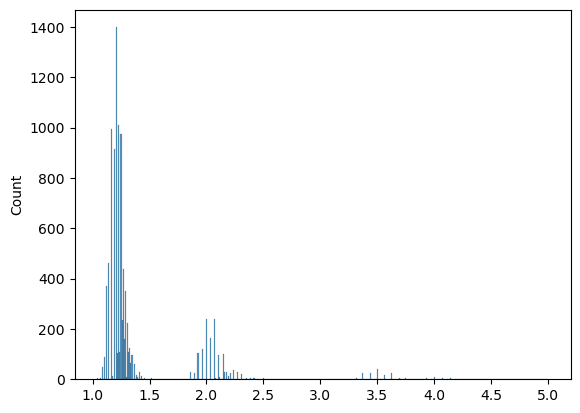

In [2]:
# Definimos una función llamada tau_f que calcula una medida estadística para un arreglo de datos
def tau_f(x):
    # Calcula el cociente entre la mediana del arreglo y su rango (diferencia entre el valor máximo y mínimo)
    res = np.median(x) / np.ptp(x)  # np.ptp(x) es "peak to peak": np.max(x) - np.min(x)
    return res  # Devuelve el valor calculado

# Definimos el número de repeticiones para el procedimiento de bootstrap
nboot = 9999  # Realizaremos 9999 remuestreos para aproximar la distribución empírica de tau

# Creamos una lista vacía para almacenar los valores de tau generados en cada iteración
tau_sol = []

# Ejecutamos un ciclo de remuestreo con reemplazo
for i in range(0, nboot):
    # Seleccionamos aleatoriamente 'nsam' índices con reemplazo desde los índices de la población
    sam = random.choices(indice, k=nsam)
    
    # Calculamos el valor de tau para la muestra seleccionada usando la función definida
    tau = tau_f(edad[sam])
    
    # Agregamos el resultado a la lista de valores tau
    tau_sol.append(tau)

# Importamos la biblioteca seaborn para visualización estadística
import seaborn as sns

# Graficamos un histograma de la distribución de valores tau obtenidos a partir del bootstrap
sns.histplot(tau_sol)


Ahora usamos el método `bootstrap` de la librería `scipy.stats`:

<Axes: ylabel='Count'>

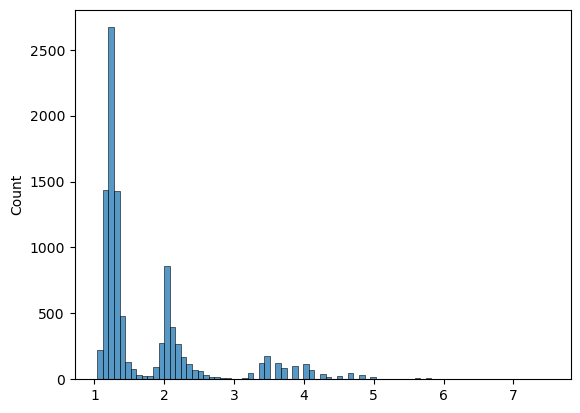

In [9]:
from scipy.stats import bootstrap
rng = np.random.default_rng()
res = bootstrap((edad,), tau_f, confidence_level=0.9, random_state=rng)
res
sns.histplot(res.bootstrap_distribution)

## Cross-validation

**¿Qué ocurre en la validación cruzada?**

En la validación cruzada (cross-validation, CV), el objetivo es estimar **el desempeño esperado del modelo** en datos no vistos. La lógica general es:

1. Divides tus datos en `k` folds.
2. Para cada fold:
   - Entrenas el modelo **desde cero** en `k-1` folds (conjunto de entrenamiento).
   - Evalúas el modelo en el fold restante (conjunto de validación).
3. Repites este proceso `k` veces y promedias las métricas.


**Entonces... ¿cómo se fijan los parámetros?**

Hay dos tipos de parámetros que debes distinguir:

### 1. Parámetros del modelo (entrenables)
- Se ajustan automáticamente durante el entrenamiento en cada fold.
- Ejemplos: coeficientes en regresión, pesos de red neuronal.

### 2. Hiperparámetros (no entrenables)
- Se definen **antes** del entrenamiento y afectan cómo el modelo se entrena.
- Ejemplos: número de árboles en un Random Forest, `C` o `gamma` en un SVM.

> **Importante:** Los hiperparámetros no deben fijarse usando todos los datos antes de hacer CV.


**¿Cómo se seleccionan los hiperparámetros?**

Mediante **validación cruzada anidada (nested CV)** o una **búsqueda de hiperparámetros dentro del CV**:

**Búsqueda de hiperparámetros dentro de la CV**
- Dentro de cada entrenamiento (en `k-1` folds), haces búsqueda (por ejemplo, grid search o random search).
- Seleccionas los mejores hiperparámetros **dentro del fold**.
- Evalúas ese modelo en el fold restante.


**¿Cuándo fijar el modelo final?**

Después de hacer CV:

1. Eliges los hiperparámetros que dieron **mejor desempeño promedio**.
2. Entrenas el **modelo final** con esos hiperparámetros sobre **todos los datos disponibles**.
3. Este es el modelo que puedes usar para predicción o producción.



| Etapa | Acción |
|-------|--------|
| Antes de CV | No fijar hiperparámetros aún |
| Dentro de CV | Buscar hiperparámetros óptimos usando solo datos de entrenamiento |
| Después de CV | Entrenar modelo final con mejores hiperparámetros usando todos los datos |


In [6]:
# Importamos los módulos necesarios
from sklearn.datasets import load_iris  # Dataset de ejemplo
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold  # Validación cruzada y búsqueda de hiperparámetros
from sklearn.tree import DecisionTreeClassifier  # Modelo de árbol de decisión
from sklearn.pipeline import Pipeline  # Para encadenar preprocesamiento + modelo
from sklearn.preprocessing import StandardScaler  # Escalado de variables (opcional para árboles)
import numpy as np  # Operaciones numéricas

# 1. Cargamos los datos
X, y = load_iris(return_X_y=True)  # X: características, y: etiquetas

# 2. Definimos un pipeline de procesamiento: escalado (aunque no es necesario para árboles) + modelo
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Escalado opcional, útil si luego cambiamos el modelo
    ('clf', DecisionTreeClassifier(random_state=42))  # Modelo de árbol con semilla fija
])

# 3. Definimos la grilla de hiperparámetros a buscar para el árbol de decisión
param_grid = {
    'clf__max_depth': [2, 3, 4, 5],  # Profundidad máxima del árbol
    'clf__min_samples_split': [2, 4, 6],  # Mínimo de muestras para dividir un nodo
    'clf__criterion': ['gini', 'entropy']  # Función de impureza: Gini o entropía
}

# 4. Definimos la estrategia de validación cruzada externa (5 folds estratificados)
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. Creamos el objeto de búsqueda de hiperparámetros con validación cruzada interna (3 folds)
clf = GridSearchCV(estimator=pipe,       # Pipeline a evaluar
                   param_grid=param_grid,  # Grilla de hiperparámetros
                   cv=3,                   # Validación cruzada interna
                   scoring='accuracy',     # Métrica de evaluación
                   n_jobs=-1)              # Usar todos los núcleos disponibles

# 6. Evaluamos el modelo con validación cruzada externa
scores = cross_val_score(clf, X, y, cv=cv_outer, scoring='accuracy')  # Se entrena y evalúa en cada fold externo
print("Puntajes por fold:", scores)  # Precisión en cada fold
print("Precisión promedio:", np.mean(scores))  # Precisión promedio como estimación del desempeño general

# 7. Entrenamos el modelo final con todos los datos usando los mejores hiperparámetros encontrados
clf.fit(X, y)
print("Mejores hiperparámetros encontrados:", clf.best_params_)

# 8. Obtenemos el modelo final completamente entrenado
modelo_final = clf.best_estimator_  # Este es el modelo listo para usar en producción


Puntajes por fold: [0.96666667 0.96666667 0.93333333 0.96666667 0.9       ]
Precisión promedio: 0.9466666666666667
Mejores hiperparámetros encontrados: {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_split': 2}


Ahora miramos los resultados del proceso de manera gráfica:

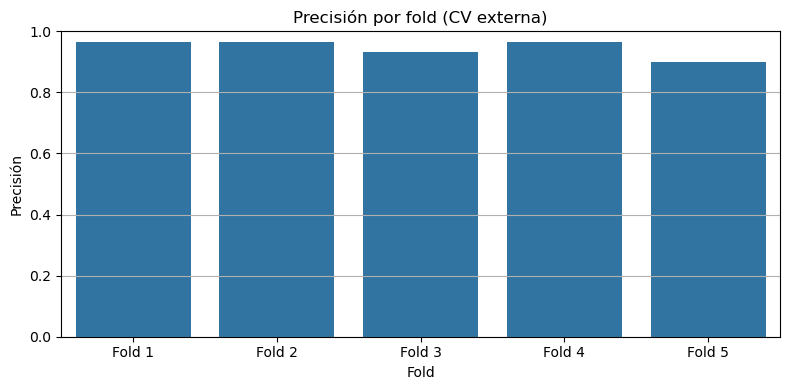

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(8, 4))
folds = [f"Fold {i+1}" for i in range(len(scores))]  # Etiquetas: Fold 1, Fold 2, ...
sns.barplot(x=folds, y=scores)
plt.title("Precisión por fold (CV externa)")
plt.xlabel("Fold")
plt.ylabel("Precisión")
plt.ylim(0, 1)  # Escala de precisión entre 0 y 1
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convierte los resultados a DataFrame y agrega una columna legible de parámetros
results = pd.DataFrame(clf.cv_results_).copy()
results['params_str'] = results['params'].astype(str)

# Identificar columnas de los folds internos
fold_columns = [col for col in results.columns if col.startswith('split') and col.endswith('_test_score')]

# Reestructurar el DataFrame para tener una fila por fold y configuración
results_long = results.melt(
    id_vars=['params_str'],
    value_vars=fold_columns,
    var_name='Fold',
    value_name='Score'
)

# Limpiar nombre del fold: de 'split0_test_score' → 'Fold 1'
results_long['Fold'] = results_long['Fold'].str.extract(r'split(\d+)_')[0].astype(int) + 1
results_long['Fold'] = 'Fold ' + results_long['Fold'].astype(str)

# Ordenar configuraciones por media de Score (para mejor visualización)
order = results_long.groupby('params_str')['Score'].mean().sort_values(ascending=False).index

# Mostrar tabla con los datos a graficar
print("Resultados detallados por fold:\n")
print(results_long)
print(results_long.shape)


Resultados detallados por fold:

                                           params_str    Fold  Score
0   {'clf__criterion': 'gini', 'clf__max_depth': 2...  Fold 1   0.96
1   {'clf__criterion': 'gini', 'clf__max_depth': 2...  Fold 1   0.96
2   {'clf__criterion': 'gini', 'clf__max_depth': 2...  Fold 1   0.96
3   {'clf__criterion': 'gini', 'clf__max_depth': 3...  Fold 1   0.98
4   {'clf__criterion': 'gini', 'clf__max_depth': 3...  Fold 1   0.98
..                                                ...     ...    ...
67  {'clf__criterion': 'entropy', 'clf__max_depth'...  Fold 3   0.96
68  {'clf__criterion': 'entropy', 'clf__max_depth'...  Fold 3   0.96
69  {'clf__criterion': 'entropy', 'clf__max_depth'...  Fold 3   0.96
70  {'clf__criterion': 'entropy', 'clf__max_depth'...  Fold 3   0.96
71  {'clf__criterion': 'entropy', 'clf__max_depth'...  Fold 3   0.96

[72 rows x 3 columns]
(72, 3)


Nota que `results_long` tiene 72 filas, ¿por qué?


La estructura del DataFrame `results_long` resulta de la combinación entre:

- El número de **combinaciones de hiperparámetros evaluadas**
- El número de **folds internos** utilizados por `GridSearchCV`


**Supuestos del ejemplo**

Se definió la grilla de hiperparámetros de la siguiente forma:

```python
param_grid = {
    'clf__criterion': ['gini', 'entropy'],            # 2 opciones
    'clf__max_depth': [2, 3, 4, 5],                   # 4 opciones
    'clf__min_samples_split': [2, 4, 6]               # 3 opciones
}


Esto da lugar a un total de combinaciones de hiperparámetros:

$2 * 4 * 3 = 24$ combinaciones

Y si GridSearchCV se ejecuta con cv=3, significa que para cada combinación de hiperparámetros, se realiza una validación cruzada interna de 3 folds.

El número total de filas de results_long es:

$24$ combinaciones * $3$ folds $= 72$ filas

Esto es exactamente lo que se espera cuando usamos GridSearchCV con `cv=3` y una malla con 24 combinaciones distintas de hiperparámetros.

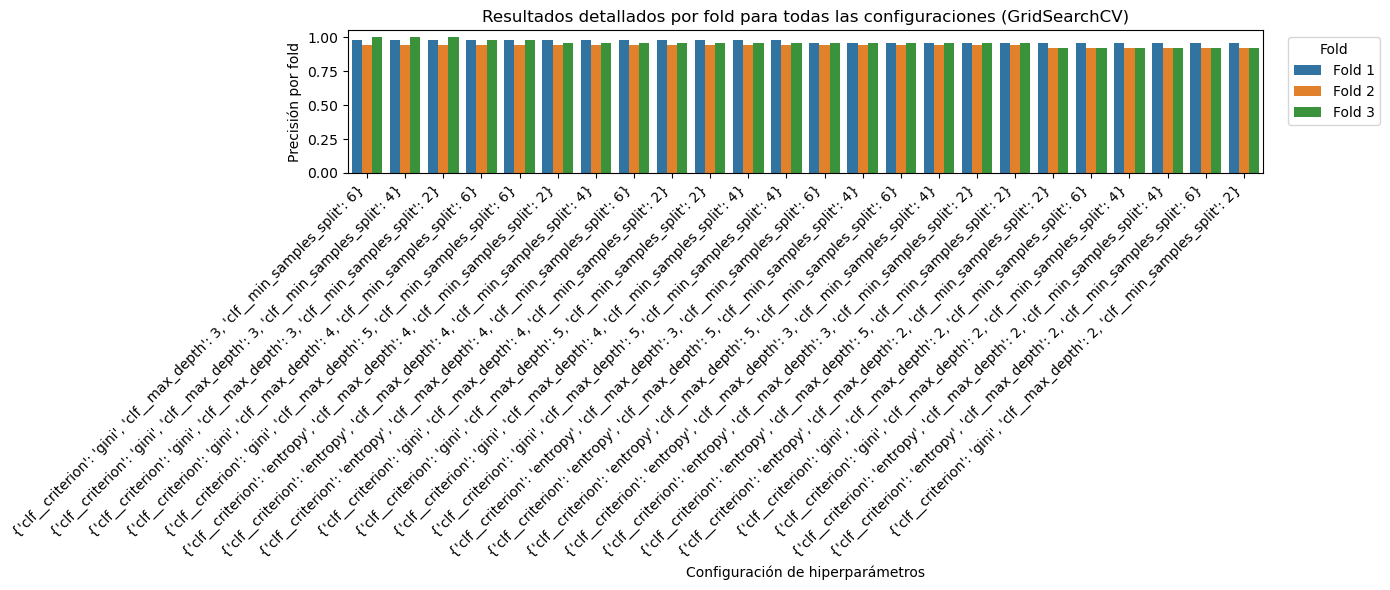

In [19]:
# Graficar resultados por fold para todas las configuraciones
plt.figure(figsize=(14, 6))
sns.barplot(x='params_str', y='Score', hue='Fold', data=results_long, order=order)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Configuración de hiperparámetros")
plt.ylabel("Precisión por fold")
plt.title("Resultados detallados por fold para todas las configuraciones (GridSearchCV)")
plt.legend(title='Fold', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Ejercicios

1. Supón que tienes un conjunto de datos reales $(X, y)$ y un modelo de aprendizaje supervisado.

**Paso 1: Realiza validación cruzada**

Haz `K-Fold Cross Validation` (por ejemplo, con 5 o 10 folds) para obtener predicciones en los **datos de test de cada fold**.

**Paso 2: Calcula predicciones promedio**

Para cada observación $ x_i $, obtén varias predicciones del modelo (una por cada fold en que fue parte del conjunto de test). Calcula:

- $ \hat{f}(x_i) $: promedio de las predicciones del modelo para $ x_i $
- $ y_i $: valor real observado

**Paso 3: Calcula estimaciones de sesgo y varianza**

Para cada observación $ x_i $:

- **Sesgo**: $ \text{Sesgo}(x_i) = \hat{f}(x_i) - y_i $
- **Sesgo²**: $ (\hat{f}(x_i) - y_i)^2 $
- **Varianza**: varianza de las predicciones del modelo sobre $ x_i $

Promedia sobre todos los $ x_i $:

$$
\text{Sesgo}^2_{\text{prom}} = \frac{1}{n} \sum_{i=1}^n \left( \hat{f}(x_i) - y_i \right)^2
$$

$$
\text{Varianza}_{\text{prom}} = \frac{1}{n} \sum_{i=1}^n \text{Var}_{k}\left( \hat{f}_k(x_i) \right)
$$


**Nota**

- Estos cálculos **requieren guardar todas las predicciones por fold para cada muestra**.
- La estimación del **error irreducible** no es posible directamente a partir de los datos observados. Puedes asumir que forma parte del error total y restarla del EPE estimado si conoces el sesgo y la varianza.
